 **Servo Prediction using Linear Regression**

**Data source**=https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv

Import Library

In [1]:
import pandas as pd

Import dataset

In [3]:
servo = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


Discribe data

In [4]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [5]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Data preprocessing

In [7]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [8]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

Define target variable(y) and Feature variable(x)

In [9]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [13]:
y = servo['Class']
X = servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

Get train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2529)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 4), (34, 4), (133,), (34,))

Modeling

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

Prediction

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([26.0341672 , 31.26527793, 19.54462992, 23.59257913, 40.03338157,
       24.98715011, 12.08334059, 19.69118525, 41.76945096, 42.17580349,
       13.81940998, 25.82275774, 17.80856053, 14.3952204 , 22.35061896,
       20.52679288, -4.69896026, 31.24237538, 32.97844477, -0.3683113 ,
       34.33106417, 32.57209223, 35.23152593, 29.93556108, 18.38437095,
        7.56418471, 29.78900574, 16.62539901, 24.49304089,  4.49839847,
       31.52507513, 24.0637858 , 36.04423101, 31.67163047])

Model Evaluation

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
mean_squared_error(y_test,y_pred)

56.9486064993352

In [27]:
mean_absolute_error(y_test,y_pred)

6.3740446090815945

In [28]:
r2_score(y_test,y_pred)

0.7059325359329273

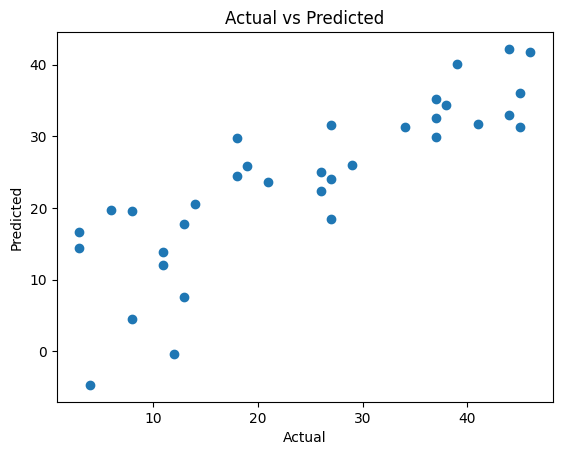

In [29]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()